# Introduction
The purpose of this notebook is to visualize the data we have been working with. Presented images below are a single record from our dataset.

## Load multispectral data

In [104]:
import rasterio
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from torch.utils.data import DataLoader
from dataset.dataset_info import ClassifierDatasetInfo
from dataset.dataset_type import DatasetType
from dataset.STARCOP_dataset import STARCOPDataset

import numpy as np
import glob
import os
os.chdir(r"..\..")

dataset = STARCOPDataset(
    data_path=r"data",
    data_type=DatasetType.TEST,
    image_info_class=ClassifierDatasetInfo,
    normalization=False
)

dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
images = next(iter(dataloader))

AVIRIS_data = images[0].squeeze(0)
mag1c = images[1].squeeze(0).squeeze(0)
is_plume = images[2].item()

## Visualization 1 - RGB and MAG1C

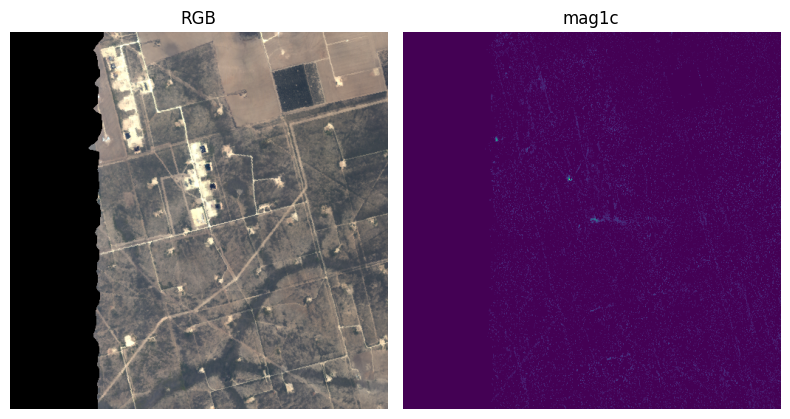

True


In [105]:
_, ax = plt.subplots(1, 2, figsize=(8, 12))

# RGB
r = AVIRIS_data[7, :, :].numpy()
g = AVIRIS_data[6, :, :].numpy()
b = AVIRIS_data[5, :, :].numpy()
image_rgb = np.asarray([r, g, b])
image_rgb = np.clip(image_rgb/60., 0, 1)
ax[0].imshow(np.transpose(np.asanyarray(image_rgb),(1,2,0)))
ax[0].set_title(f"RGB")
ax[0].axis('off')

# mag1c
image_mag1c = mag1c.numpy()
ax[1].imshow(image_mag1c)
ax[1].set_title(f"mag1c")
ax[1].axis('off')  # Turn off axis

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()
print(is_plume)

## Visualization 2 - SWIR

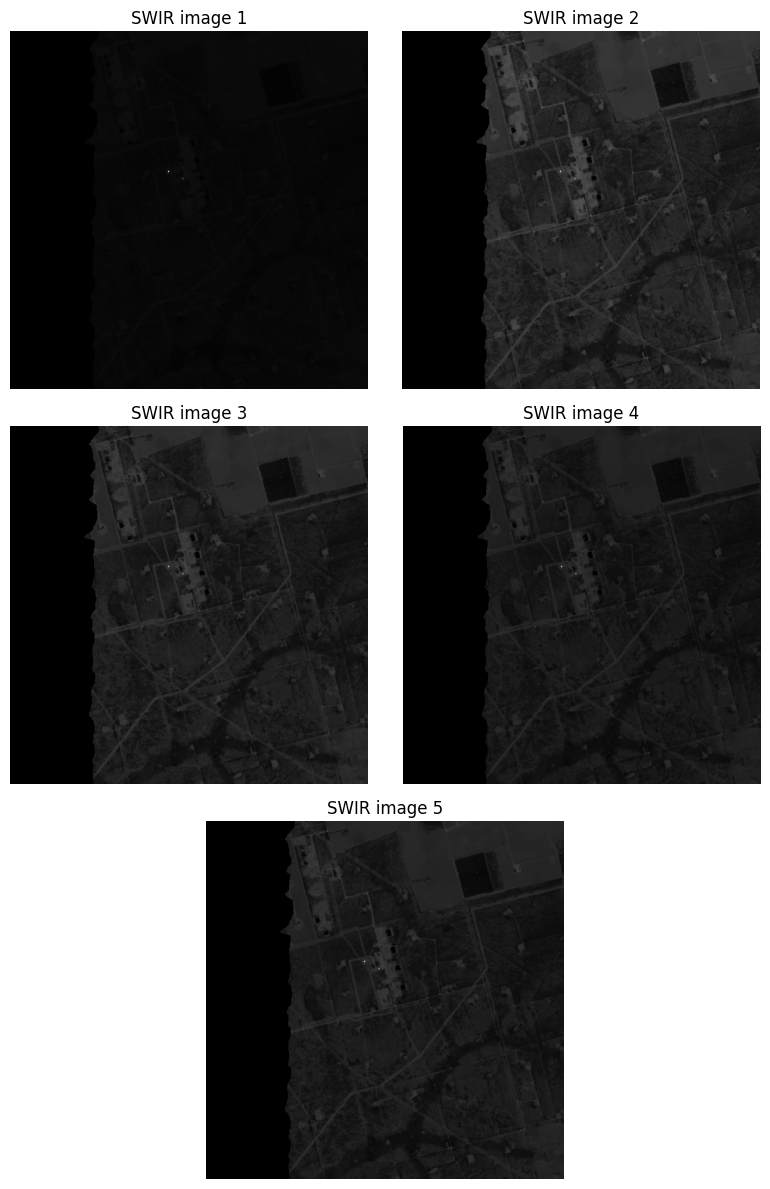

In [106]:
# SWIR
images_swir = AVIRIS_data[:5, :, :]

fig = plt.figure(figsize=(8, 12))
fig.set_facecolor("white")
gs = GridSpec(3, 2, figure=fig)

for i in range(4):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.imshow(images_swir[i,:,:].numpy(), cmap="gray")
    ax.set_title(f'SWIR image {i+1}')
    ax.axis('off')

ax7 = fig.add_subplot(gs[2, :])
ax7.imshow(images_swir[4,:,:].numpy(), cmap="gray")
ax7.set_title(f'SWIR image 5')
ax7.axis('off')

# Adjust layout
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.tight_layout()
plt.show()

## Restore environment

In [ ]:
os.chdir(r".\notebooks\tools")